<a href="https://colab.research.google.com/github/AidanoFilho/AidanoFilho/blob/main/Previs%C3%A3o_de_Demanda_Venda_de_Carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from sklearn import neighbors, linear_model, neural_network, ensemble, svm
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
%matplotlib inline

In [ ]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    mean_absolute_percentage_error = metrics.mean_absolute_percentage_error(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAPE: ', round(mean_absolute_percentage_error,4))

In [ ]:
df = pd.read_csv("http://diegocarvalho.org/logbook/974bc17c11f1a052a80e46cc076ae5b0.csv") # traindata.csv
df

,ID,Product_Cat,Store_ID,Product_ID,MONTH_CODE,Demand
0,1,B,XYZ003,Part_132_B,2011/06,1
1,2,B,XYZ003,Part_400_B,2011/06,1
2,3,B,XYZ003,Part_501_B,2011/06,1
3,4,B,XYZ003,Part_184_B,2011/07,1
4,5,B,XYZ003,Part_184_B,2011/07,2
...,...,...,...,...,...,...
12534,12535,A,XYZ0051,Part_753_A,2019/12,1
12535,12536,A,XYZ0055,Part_756_A,2019/12,1
12536,12537,A,XYZ0059,Part_506_A,2019/12,1
12537,12538,A,XYZ0051,Part_760_A,2019/12,2


In [ ]:
df['DATE'] = pd.to_datetime(df['MONTH_CODE'])
df.dtypes

ID                      int64
Product_Cat            object
Store_ID               object
Product_ID             object
MONTH_CODE             object
Demand                  int64
DATE           datetime64[ns]
dtype: object

In [ ]:
df = df.set_index('DATE')
df.head()

,ID,Product_Cat,Store_ID,Product_ID,MONTH_CODE,Demand
DATE,,,,,,
2011-06-01,1,B,XYZ003,Part_132_B,2011/06,1
2011-06-01,2,B,XYZ003,Part_400_B,2011/06,1
2011-06-01,3,B,XYZ003,Part_501_B,2011/06,1
2011-07-01,4,B,XYZ003,Part_184_B,2011/07,1
2011-07-01,5,B,XYZ003,Part_184_B,2011/07,2


In [ ]:
Tipo_Carro = 'A'
monthly = df[df.Product_Cat == 'A'].resample('m', convention='start').sum()
teste = df[df.Product_Cat == 'A']
print(teste)
print(monthly.head())
m = monthly[monthly.Demand != 0]

               ID Product_Cat Store_ID  Product_ID MONTH_CODE  Demand
DATE                                                                 
2015-12-01   2566           A  XYZ0051  Part_521_A    2015/12       1
2015-12-01   2567           A  XYZ0055  Part_539_A    2015/12       1
2015-12-01   2568           A  XYZ0051  Part_567_A    2015/12       2
2015-12-01   2569           A  XYZ0051  Part_294_A    2015/12       1
2015-12-01   2570           A  XYZ0055  Part_647_A    2015/12       1
...           ...         ...      ...         ...        ...     ...
2019-12-01  12535           A  XYZ0051  Part_753_A    2019/12       1
2019-12-01  12536           A  XYZ0055  Part_756_A    2019/12       1
2019-12-01  12537           A  XYZ0059  Part_506_A    2019/12       1
2019-12-01  12538           A  XYZ0051  Part_760_A    2019/12       2
2019-12-01  12539           A  XYZ0055  Part_762_A    2019/12       2

[3361 rows x 6 columns]
               ID  Demand
DATE                     
2015-12-31  1

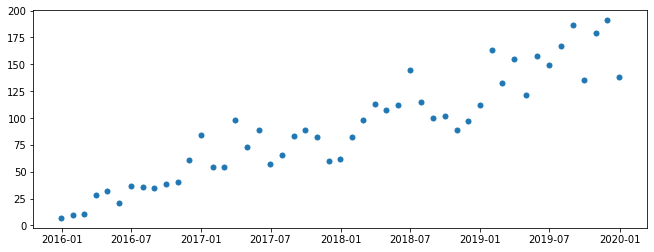

In [ ]:
fig, ax = plt.subplots(figsize = (11,4))
ax.plot(m['Demand'], marker='o', markersize=5, label='Monthly data', linestyle="None")
#print(m['Demand'])

Text(0.5, 1.0, 'Product A')

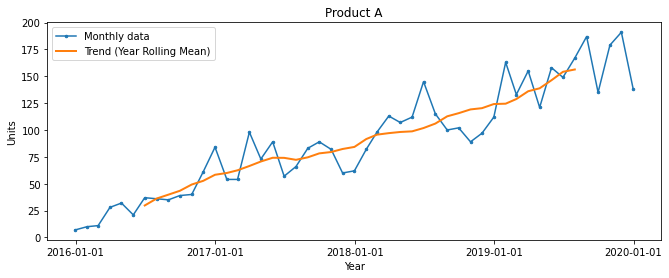

In [ ]:
d365_rol = monthly['Demand'].rolling(window = 12, center = True).mean()

#print(d365_rol)

fig, ax = plt.subplots(figsize = (11,4))

ax.plot(monthly['Demand'], marker='.', markersize=5, label='Monthly data')
ax.plot(d365_rol, linewidth=2, label='Trend (Year Rolling Mean)')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Units')
ax.set_title('Product A')

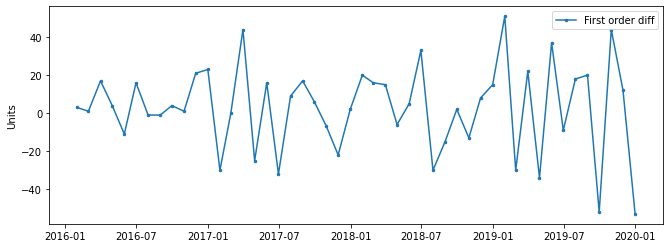

In [ ]:
fig, ax = plt.subplots(figsize = (11,4))

ax.plot(monthly['Demand'].diff(), marker='.', markersize=5, label='First order diff')
ax.set_ylabel('Units')
ax.legend();

In [ ]:
X_train = pd.to_numeric(monthly[:'2019-08-31'].drop(['Demand','ID'], axis = 1).index).values.reshape(-1, 1)
X_test  = pd.to_numeric(monthly['2019-09-30':].drop(['Demand','ID'], axis = 1).index).values.reshape(-1, 1)
y_train = monthly.loc[:'2019-08-31', 'Demand']
y_test  = monthly.loc['2019-09-30':, 'Demand']
print(y_test )


DATE
2019-09-30    135
2019-10-31    179
2019-11-30    191
2019-12-31    138
Freq: M, Name: Demand, dtype: int64


[array([ 0.38123406, -5.69177792, -0.80324748, -0.16978214]), array([-2.77668524, -0.04989115, -4.9306678 , -5.51527455]), array([-2.51011253, -0.88313036, -1.08864475, -5.53632742])]


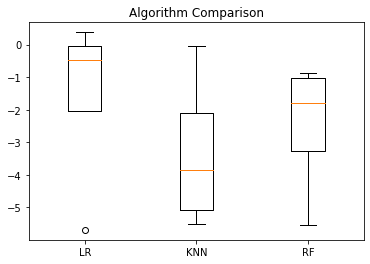

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', linear_model.LinearRegression()))
#models.append(('NN', neural_network.MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', neighbors.KNeighborsRegressor(n_neighbors=4,metric="chebyshev")))
models.append(('RF', ensemble.RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
#models.append(('SVR', svm.SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits=4)

 #cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring="explained_variance")
 cv_results = cross_val_score(model, X_train, y_train, cv=tscv)
 #print(cv_results)
 results.append(cv_results)
 names.append(name)
 #print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
print(results)
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

Resultado para os dados de treino


17.0
-17.0
explained_variance:  0.9587
r2:  0.9585
MAE:  7.3222
MSE:  85.7944
RMSE:  9.2625
MAPE:  0.0974


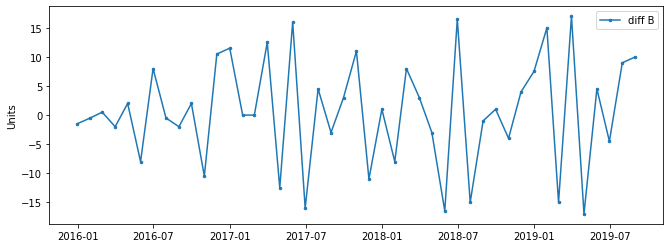

In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors=2,metric="euclidean")
Y_Resultado_Treino_knn = knn.fit(X_train, y_train).predict(X_train)
dif_knn = y_train- Y_Resultado_Treino_knn
print(dif_knn.max())
print(dif_knn.min())



fig, ax = plt.subplots(figsize = (11,4))

ax.plot(dif_knn, marker='.', markersize=5, label='diff B')
ax.set_ylabel('Units')
ax.legend();

regression_results(y_train, Y_Resultado_Treino_knn)

36.06533293823304
-34.81811843229161
explained_variance:  0.8622
r2:  0.8622
MAE:  12.9539
MSE:  284.9108
RMSE:  16.8793
MAPE:  0.2017


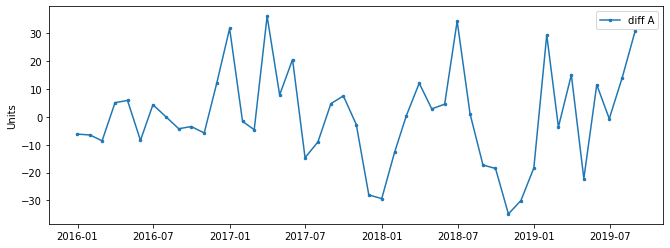

In [ ]:
lin = linear_model.LinearRegression()
Y_Resultado_Treino_lin_regr = lin.fit(X_train, y_train).predict(X_train)


dif_lin_regr = y_train - Y_Resultado_Treino_lin_regr

#dif_lin_regr_por = (dif_lin_regr/Y_Resultado_Treino_lin_regr)*100


#print(y_train)

print(dif_lin_regr.max())
print(dif_lin_regr.min())

#print(dif_lin_regr_por.max())

#print(dif_lin_regr_por.min())

fig, ax = plt.subplots(figsize = (11,4))

ax.plot(dif_lin_regr, marker='.', markersize=5, label='diff A')
ax.set_ylabel('Units')
ax.legend();



regression_results(y_train, Y_Resultado_Treino_lin_regr)

14.26666666666668
-14.166666666666671
explained_variance:  0.9836
r2:  0.9836
MAE:  4.4637
MSE:  33.9982
RMSE:  5.8308
MAPE:  0.0651


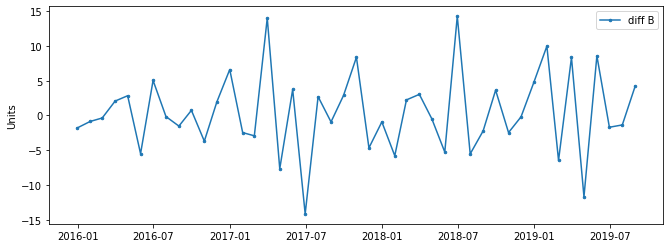

In [ ]:
rand = ensemble.RandomForestRegressor(n_estimators = (30))
Y_Resultado_Treino_rand_flor = rand.fit(X_train, y_train).predict(X_train)


dif_rand_flor = y_train - Y_Resultado_Treino_rand_flor
print(dif_rand_flor.max())
print(dif_rand_flor.min())

fig, ax = plt.subplots(figsize = (11,4))

ax.plot(dif_rand_flor, marker='.', markersize=5, label='diff B')
ax.set_ylabel('Units')
ax.legend();


regression_results(y_train, Y_Resultado_Treino_rand_flor)

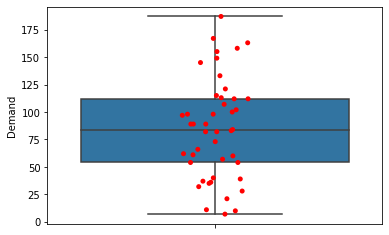

In [ ]:
import seaborn as sns

dados_teste = {}
dados_teste["AV"] = y_train

sns.boxplot(data = dados_teste, y = "AV" )
sns.stripplot(data = dados_teste, y = "AV", color = 'red')

#sns.boxplot(y_train)
#sns.stripplot(y_train, color = 'red')

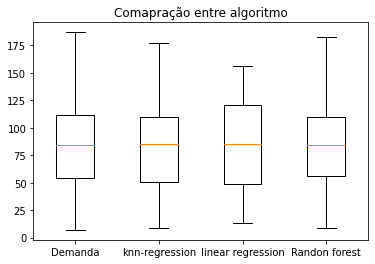

In [ ]:
#plt.boxplot([Y_Resultado_Treino_knn],[Y_Resultado_Treino_lin_regr],[Y_Resultado_Treino_rand_flor])

dados_teste = [y_train,Y_Resultado_Treino_knn,Y_Resultado_Treino_lin_regr,Y_Resultado_Treino_rand_flor]
nome = ["Demanda","knn-regression", "linear regression", "Randon forest"]
plt.boxplot(dados_teste, labels=nome)

plt.title("Comapração entre algoritmo")
plt.show()

Resultado para os dados de teste


In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors=15,metric="euclidean")
Y = knn.fit(X_train, y_train).predict(X_test)
Data_Prev = [pd.to_datetime(['2020-01-31']),pd.to_datetime(['2020-02-29']),pd.to_datetime(['2020-03-31'])]
Previsao_demanda_knn = knn.predict(Data_Prev)
print(Previsao_demanda_knn)
print(Y)
regression_results(y_test, Y)

[132.86666667 132.86666667 132.86666667]
[132.86666667 132.86666667 132.86666667 132.86666667]
explained_variance:  0.0
r2:  -1.2805
MAE:  27.8833
MSE:  1384.6678
RMSE:  37.2111
MAPE:  0.1538


[132.86666667 132.86666667 132.86666667 132.86666667]


Text(0.5, 1.0, 'KNN Regression')

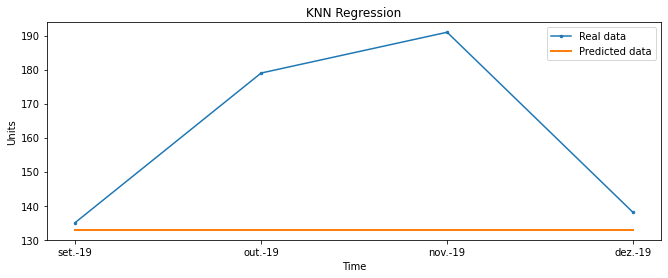

In [ ]:
fig, ax = plt.subplots(figsize = (11,4))


ax.plot(y_test.values, marker='.', markersize=5, label='Real data')
ax.plot(Y, linewidth=2, label='Predicted data')

print(Y)
Data_eixo_x = ['set.-19','out.-19','nov.-19','dez.-19']


#print(y_test.index)
#ax.xaxis.set_major_locator(mdates.YearLocator())

values = range(len(y_test.index))
values = range(len(Data_eixo_x))

plt.xticks(values,Data_eixo_x)

ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Units')
ax.set_title('KNN Regression')


In [ ]:
lin = linear_model.LinearRegression()
Y = lin.fit(X_train, y_train).predict(X_test)
#Data_Prev_RL = [pd.to_datetime(['2020-01-31']),pd.to_datetime(['2020-02-29']),pd.to_datetime(['2020-03-31'])]
#Moth_code_prev = pd.to_datetime(['2020/01','2020/02','2020/03'])

#print(Moth_code_prev)

#Moth_code_prev = Moth_code_prev.index('Dados_1')

#List_Moth = pd.to_datetime(Moth_code_prev)


#Data_Prev_RL = dt.strptime(['2020-01-31'],'yyyy-MM-DD')
#print(type(List_Moth))
#Previsao_demanda_RL = lin.predict(Moth_code_prev)
#print(Previsao_demanda_RL)
print(Y)
regression_results(y_test, Y)

[159.51599884 162.82927517 166.03567161 169.34894794]
explained_variance:  0.006
r2:  -0.0164
MAE:  24.25
MSE:  617.1252
RMSE:  24.842
MAPE:  0.1575


[159.51599884 162.82927517 166.03567161 169.34894794]


Text(0.5, 1.0, 'Linear Regression')

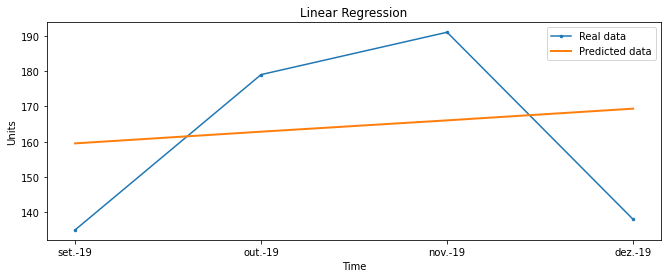

In [ ]:
fig, ax = plt.subplots(figsize = (11,4))

ax.plot(y_test.values, marker='.', markersize=5, label='Real data')
ax.plot(Y, linewidth=2, label='Predicted data')
print(Y)
#ax.xaxis.set_major_locator(mdates.YearLocator())

Data_eixo_x = ['set.-19','out.-19','nov.-19','dez.-19']

values = range(len(Data_eixo_x))

#print(y_test.index)

plt.xticks(values,Data_eixo_x)

ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Units')
ax.set_title('Linear Regression')

In [ ]:
rand = ensemble.RandomForestRegressor(n_estimators = 200)
Y = rand.fit(X_train, y_train).predict(X_test)

print(Y)
regression_results(y_test, Y)

[178.32 178.32 178.32 178.32]
explained_variance:  0.0
r2:  -0.5084
MAE:  24.25
MSE:  915.8924
RMSE:  30.2637
MAPE:  0.1708


[178.32 178.32 178.32 178.32]


Text(0.5, 1.0, 'Random Forest Regressor')

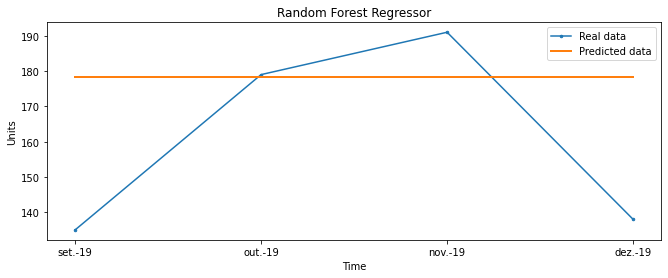

In [ ]:
fig, ax = plt.subplots(figsize = (11,4))


ax.plot(y_test.values, marker='.', markersize=5, label='Real data')
ax.plot(Y, linewidth=2, label='Predicted data')

print(Y)
Data_eixo_x = ['set.-19','out.-19','nov.-19','dez.-19']


#print(y_test.index)
#ax.xaxis.set_major_locator(mdates.YearLocator())

values = range(len(y_test.index))
values = range(len(Data_eixo_x))

plt.xticks(values,Data_eixo_x)

ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Units')
ax.set_title('Random Forest Regressor')


[178.32 178.32 178.32 178.32]


Text(0.5, 1.0, 'Linear Regression')

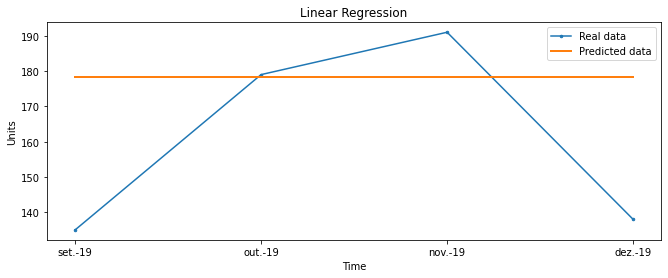

In [ ]:
fig, ax = plt.subplots(figsize = (11,4))

ax.plot(y_test.values, marker='.', markersize=5, label='Real data')
ax.plot(Y, linewidth=2, label='Predicted data')
print(Y)
#ax.xaxis.set_major_locator(mdates.YearLocator())

Data_eixo_x = ['set.-19','out.-19','nov.-19','dez.-19']

values = range(len(Data_eixo_x))

#print(y_test.index)

plt.xticks(values,Data_eixo_x)

ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Units')
ax.set_title('Linear Regression')